In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import datetime
pd.options.display.max_columns = None

%matplotlib inline

pump = pd.read_csv('pump.csv')
labels = pd.read_csv('pump_labels.csv')
pump['status'] = labels.status_group
pump['date_recorded'] = pd.to_datetime(pump['date_recorded']) # converting date to datetime object

In [2]:
pump.head()

,id,amount_tsh,date_recorded,funder,gps_height,installer,longitude,latitude,wpt_name,num_private,basin,subvillage,region,region_code,district_code,lga,ward,population,public_meeting,recorded_by,scheme_management,scheme_name,permit,construction_year,extraction_type,extraction_type_group,extraction_type_class,management,management_group,payment,payment_type,water_quality,quality_group,quantity,quantity_group,source,source_type,source_class,waterpoint_type,waterpoint_type_group,status
0,69572,6000.0,2011-03-14,Roman,1390,Roman,34.938093,-9.856322,none,0,Lake Nyasa,Mnyusi B,Iringa,11,5,Ludewa,Mundindi,109,True,GeoData Consultants Ltd,VWC,Roman,False,1999,gravity,gravity,gravity,vwc,user-group,pay annually,annually,soft,good,enough,enough,spring,spring,groundwater,communal standpipe,communal standpipe,functional
1,8776,0.0,2013-03-06,Grumeti,1399,GRUMETI,34.698766,-2.147466,Zahanati,0,Lake Victoria,Nyamara,Mara,20,2,Serengeti,Natta,280,NaN,GeoData Consultants Ltd,Other,NaN,True,2010,gravity,gravity,gravity,wug,user-group,never pay,never pay,soft,good,insufficient,insufficient,rainwater harvesting,rainwater harvesting,surface,communal standpipe,communal standpipe,functional
2,34310,25.0,2013-02-25,Lottery Club,686,World vision,37.460664,-3.821329,Kwa Mahundi,0,Pangani,Majengo,Manyara,21,4,Simanjiro,Ngorika,250,True,GeoData Consultants Ltd,VWC,Nyumba ya mungu pipe scheme,True,2009,gravity,gravity,gravity,vwc,user-group,pay per bucket,per bucket,soft,good,enough,enough,dam,dam,surface,communal standpipe multiple,communal standpipe,functional
3,67743,0.0,2013-01-28,Unicef,263,UNICEF,38.486161,-11.155298,Zahanati Ya Nanyumbu,0,Ruvuma / Southern Coast,Mahakamani,Mtwara,90,63,Nanyumbu,Nanyumbu,58,True,GeoData Consultants Ltd,VWC,NaN,True,1986,submersible,submersible,submersible,vwc,user-group,never pay,never pay,soft,good,dry,dry,machine dbh,borehole,groundwater,communal standpipe multiple,communal standpipe,non functional
4,19728,0.0,2011-07-13,Action In A,0,Artisan,31.130847,-1.825359,Shuleni,0,Lake Victoria,Kyanyamisa,Kagera,18,1,Karagwe,Nyakasimbi,0,True,GeoData Consultants Ltd,NaN,NaN,True,0,gravity,gravity,gravity,other,other,never pay,never pay,soft,good,seasonal,seasonal,rainwater harvesting,rainwater harvesting,surface,communal standpipe,communal standpipe,functional


In [3]:
pump.columns

Index(['id', 'amount_tsh', 'date_recorded', 'funder', 'gps_height',
       'installer', 'longitude', 'latitude', 'wpt_name', 'num_private',
       'basin', 'subvillage', 'region', 'region_code', 'district_code', 'lga',
       'ward', 'population', 'public_meeting', 'recorded_by',
       'scheme_management', 'scheme_name', 'permit', 'construction_year',
       'extraction_type', 'extraction_type_group', 'extraction_type_class',
       'management', 'management_group', 'payment', 'payment_type',
       'water_quality', 'quality_group', 'quantity', 'quantity_group',
       'source', 'source_type', 'source_class', 'waterpoint_type',
       'waterpoint_type_group', 'status'],
      dtype='object')

Just looking at the description of the variables, we'll probably drop id, funder, (and possibly installer since they're probably the same as the funder). We'll have to investigate others. There are also quite a few features which probably repeat information. For example region, region_code, district_code, lga, ward, subvillage all probably convey location just at different levels.

In [4]:
pump.describe()

,id,amount_tsh,gps_height,longitude,latitude,num_private,region_code,district_code,population,construction_year
count,59400.000000,59400.000000,59400.000000,59400.000000,5.940000e+04,59400.000000,59400.000000,59400.000000,59400.000000,59400.000000
mean,37115.131768,317.650385,668.297239,34.077427,-5.706033e+00,0.474141,15.297003,5.629747,179.909983,1300.652475
std,21453.128371,2997.574558,693.116350,6.567432,2.946019e+00,12.236230,17.587406,9.633649,471.482176,951.620547
min,0.000000,0.000000,-90.000000,0.000000,-1.164944e+01,0.000000,1.000000,0.000000,0.000000,0.000000
25%,18519.750000,0.000000,0.000000,33.090347,-8.540621e+00,0.000000,5.000000,2.000000,0.000000,0.000000
50%,37061.500000,0.000000,369.000000,34.908743,-5.021597e+00,0.000000,12.000000,3.000000,25.000000,1986.000000
75%,55656.500000,20.000000,1319.250000,37.178387,-3.326156e+00,0.000000,17.000000,5.000000,215.000000,2004.000000
max,74247.000000,350000.000000,2770.000000,40.345193,-2.000000e-08,1776.000000,99.000000,80.000000,30500.000000,2013.000000


We should double check the population and construction years. 25th percentiles in both population and construction year are 0. We should probably treat populations and construction years = 0 as missing data.

Could create feature that is the difference between recorded year and installation year.

In [5]:
pump.dtypes

id                                int64
amount_tsh                      float64
date_recorded            datetime64[ns]
funder                           object
gps_height                        int64
installer                        object
longitude                       float64
latitude                        float64
wpt_name                         object
num_private                       int64
basin                            object
subvillage                       object
region                           object
region_code                       int64
district_code                     int64
lga                              object
ward                             object
population                        int64
public_meeting                   object
recorded_by                      object
scheme_management                object
scheme_name                      object
permit                           object
construction_year                 int64
extraction_type                  object


In [6]:
pump.nunique().sort_values(ascending = False)

id                       59400
latitude                 57517
longitude                57516
wpt_name                 37400
subvillage               19287
scheme_name               2696
gps_height                2428
installer                 2145
ward                      2092
funder                    1897
population                1049
date_recorded              356
lga                        125
amount_tsh                  98
num_private                 65
construction_year           55
region_code                 27
region                      21
district_code               20
extraction_type             18
extraction_type_group       13
scheme_management           12
management                  12
source                      10
basin                        9
water_quality                8
payment_type                 7
source_type                  7
waterpoint_type              7
extraction_type_class        7
payment                      7
waterpoint_type_group        6
quality_

In [7]:
pump.isna().sum().sort_values(ascending = False)

scheme_name              28166
scheme_management         3877
installer                 3655
funder                    3635
public_meeting            3334
permit                    3056
subvillage                 371
ward                         0
lga                          0
district_code                0
region_code                  0
region                       0
num_private                  0
basin                        0
wpt_name                     0
latitude                     0
longitude                    0
gps_height                   0
date_recorded                0
amount_tsh                   0
population                   0
status                       0
recorded_by                  0
water_quality                0
waterpoint_type              0
source_class                 0
source_type                  0
source                       0
quantity_group               0
quantity                     0
quality_group                0
payment_type                 0
waterpoi

We'll definitely drop scheme_name due to there being so many missing values.

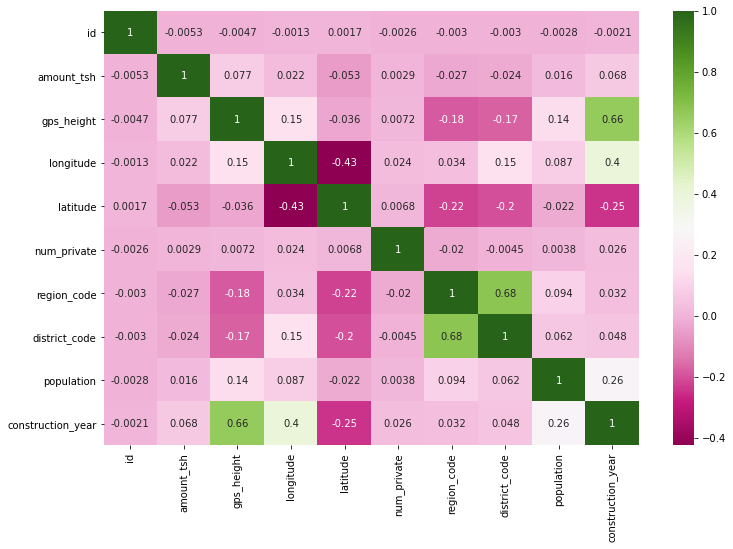

In [8]:
plt.figure(figsize=(12,8))
sns.heatmap(pump.corr(), annot=True, cmap = 'PiYG')
plt.show()

Decent bit of correlation between longitude and latitude. We could probably drop one in the future if they prove usefull. Also weird correlation between gps height and construction year.

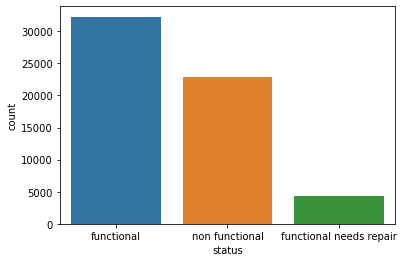

In [9]:
sns.countplot(data = pump, x = 'status')
plt.show()

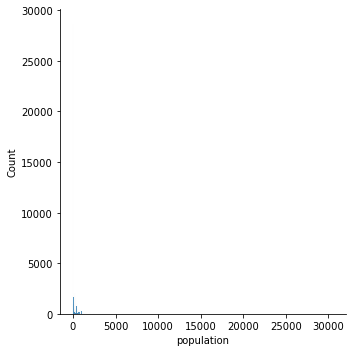

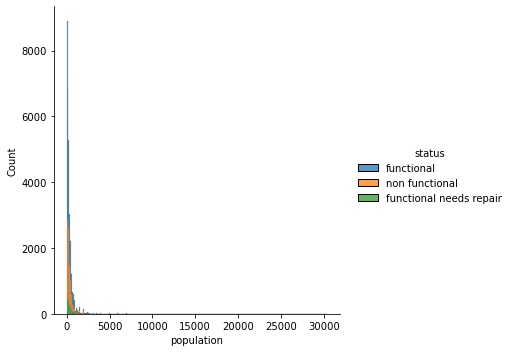

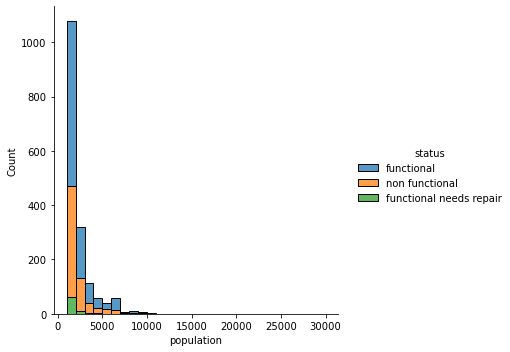

In [10]:
sns.displot(data = pump, x='population')

pop_spacing = list(range(10,30500,100))
sns.displot(x=pump.population, bins = pop_spacing, hue = pump.status, multiple = 'stack')
sns.displot(x=pump.population, bins = list(range(1000,30500,1000)), hue = pump.status, multiple = 'stack')

plt.show()

Population is heavily right skewed. Also appears to have quite a lot of data with populations as 0. We'll have to treat this data as missing.

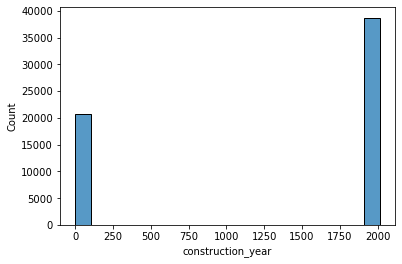

<function matplotlib.pyplot.show(close=None, block=None)>

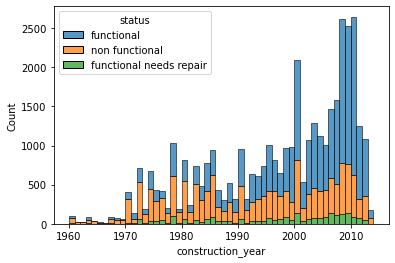

In [11]:
sns.histplot(data = pump, x = 'construction_year')
plt.show()

construction_year_spacing = list(range(1960,2015))
sns.histplot(data = pump, x = 'construction_year', bins = construction_year_spacing, hue = 'status', multiple = 'stack')
plt.show

As I suspected, we've got quite a bit of missing construction year data. We'll treat all constructions years less than 1950 as missing data. It also seems like the construction year is going to be an important feature despite the missing data. This is no surprise as older systems are probably breaking more often nowadays.

<function matplotlib.pyplot.show(close=None, block=None)>

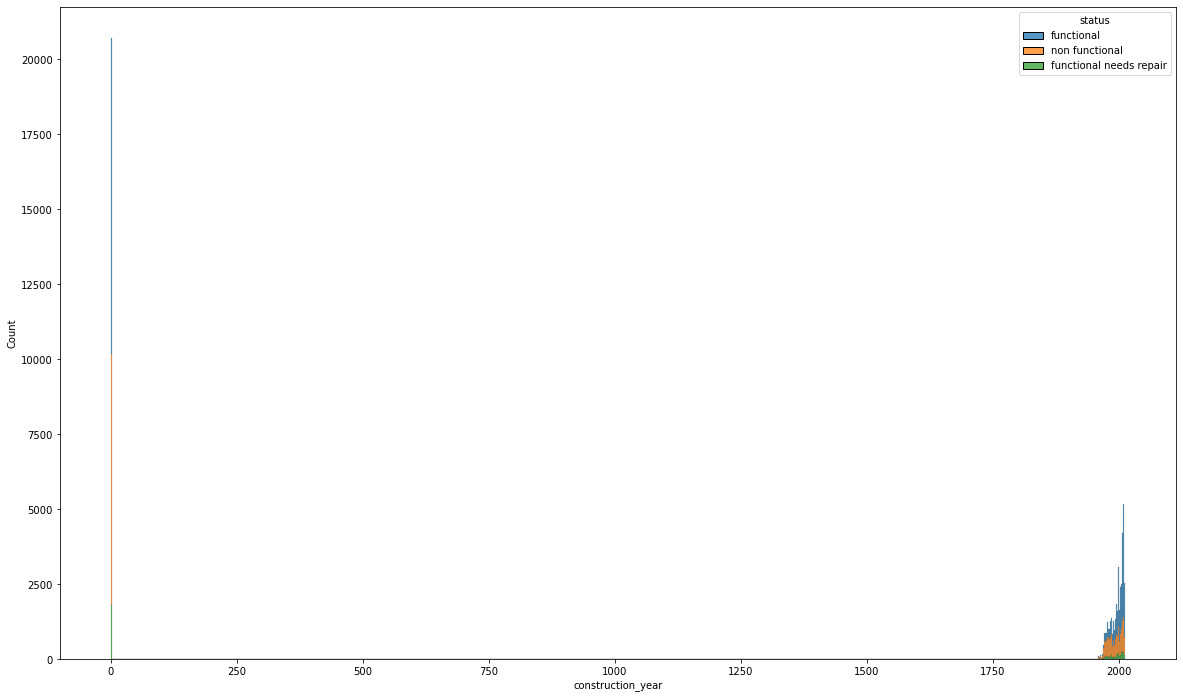

In [2]:
fig, ax = plt.subplots(figsize = (20,12))
sns.histplot(data = pump, x = 'construction_year', bins = 1000, hue = 'status', multiple = 'stack', ax = ax)
plt.show

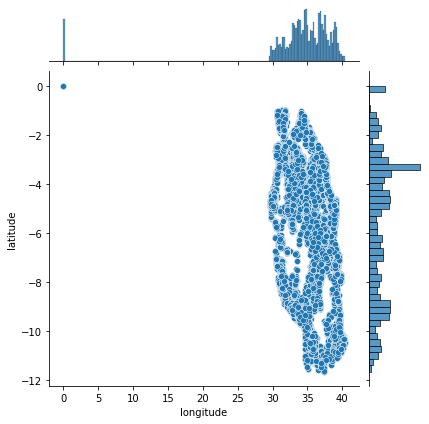

In [12]:
sns.jointplot(data=pump, x="longitude", y="latitude")

Since our data is coming from Tanzinia (which is not even close to 0 degrees longitude). We should treat data with 0 degrees longitude as missing.

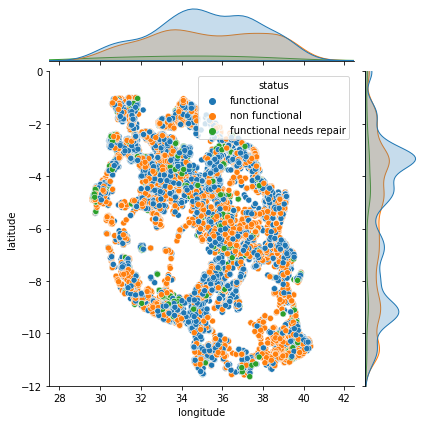

In [13]:
sns.jointplot(data=pump, x="longitude", y="latitude", hue = 'status', xlim = (27.5,42.5), ylim = (-12,0))
# sns.jointplot(data=pump, x="longitude", y="latitude", hue = 'status', xlim = (27.5,42.5), ylim = (-12,0), kind ='kde')

There doesn't appear to be a super clear relationship between longitude and latitude with pump status but it is worth exploring in the future. That being said, we've got a cool map of Tanzinia!

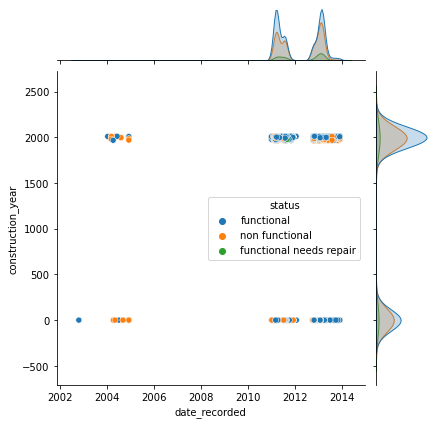

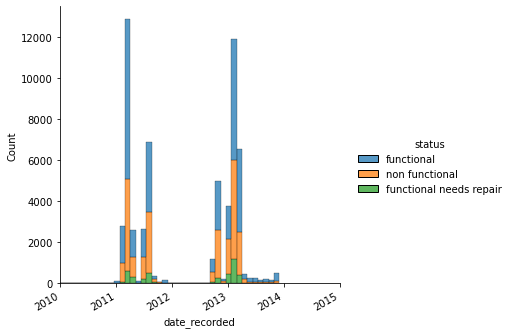

In [14]:
sns.jointplot(data=pump, x='date_recorded', y='construction_year', hue = 'status')
sns.displot(data = pump, x='date_recorded', hue='status', multiple = 'stack')
plt.xlim(datetime.date(2010, 1, 1), datetime.date(2015,1,1))
plt.gcf().autofmt_xdate()

On it's own, date_recorded doesn't appear to be that useful. We could try extracting the year and months separately as well as checking the year recorded compared the construction year.

In [5]:
pump['year_recorded'] = pd.DatetimeIndex(pump['date_recorded']).year
pump['month_recorded'] = pd.DatetimeIndex(pump['date_recorded']).month

pump['age'] = pump['year_recorded'] - pump['construction_year']

pump[['date_recorded', 'year_recorded', 'month_recorded', 'construction_year', 'age']].head()

,date_recorded,year_recorded,month_recorded,construction_year,age
0,2011-03-14,2011,3,1999,12
1,2013-03-06,2013,3,2010,3
2,2013-02-25,2013,2,2009,4
3,2013-01-28,2013,1,1986,27
4,2011-07-13,2011,7,0,2011


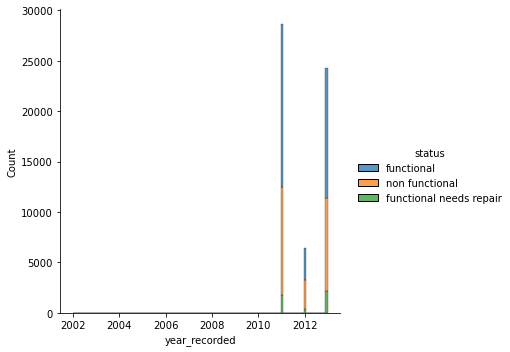

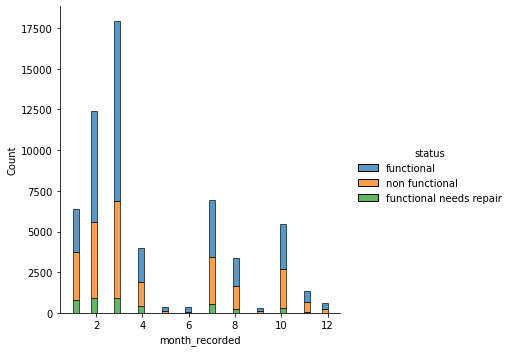

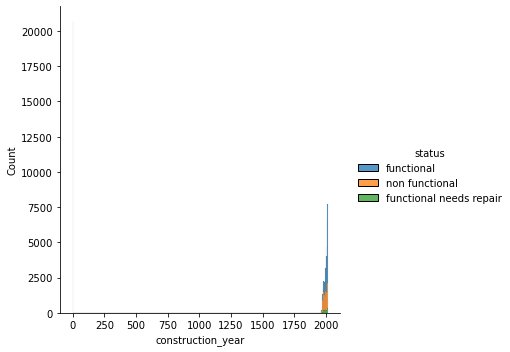

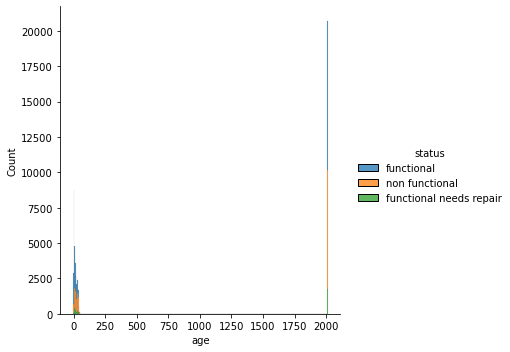

In [7]:
sns.displot(data = pump, x = 'year_recorded', hue = 'status', multiple = 'stack')
sns.displot(data = pump, x = 'month_recorded', hue = 'status', multiple = 'stack')
sns.displot(data = pump, x = 'construction_year', hue = 'status', multiple = 'stack', bins = 500)
sns.displot(data = pump, x = 'age', hue = 'status', multiple = 'stack', bins = 500)

We will have to deal with all of the missing construction_year data before we can see if age will help us.

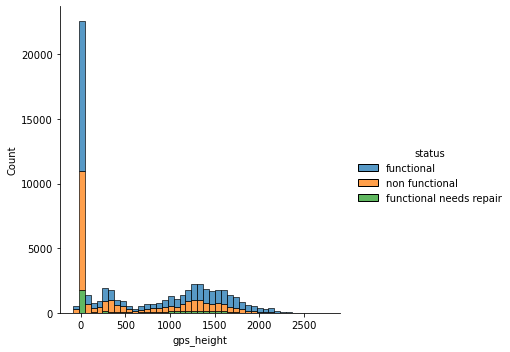

In [17]:
sns.displot(data = pump, x = 'gps_height', hue = 'status', multiple = 'stack')

Quite a bit of data with gps_height = 0. I'm not sure if we can treat this data as missing since it is possible that the well is at sea level. We also have some data with gps height below 0. Some quick research shows that the lowest point in Tanzinia is sea level, but it possible that the altitude reading is below sea level since the well is quite deep. If we look at an elevation map in Tanzinia, it looks like gps_height is in meters.

In order to check, we can try and check the gps height relative to the latitude and longitude.

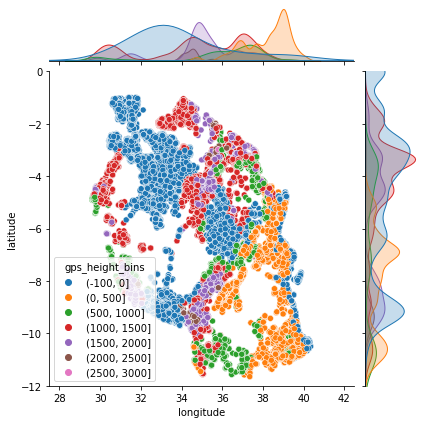

In [18]:
pump['gps_height_bins'] = pd.cut(pump['gps_height'], bins = [-100, 0, 500, 1000, 1500, 2000, 2500, 3000]) 
sns.jointplot(data=pump, x='longitude', y='latitude', hue = 'gps_height_bins', xlim = (27.5,42.5), ylim = (-12,0))

If we take a look at an actual elevation map of Tanzinia, it looks like almost all of the gps heights <= 0 are incorrect except those on the east side of the country. So we probably need to treat the gps data with elevations of <= 0 and with longitudes <= 38 as missing. If we can, we could use our lat long data in conjunction with other elevation data to manufacture more correct gps_height data.

[Text(0, 0, '(-100, 0]'),
 Text(1, 0, '(0, 500]'),
 Text(2, 0, '(500, 1000]'),
 Text(3, 0, '(1000, 1500]'),
 Text(4, 0, '(1500, 2000]'),
 Text(5, 0, '(2000, 2500]'),
 Text(6, 0, '(2500, 3000]')]

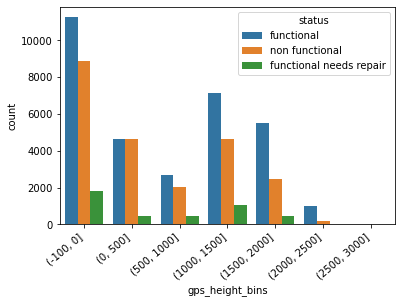

In [19]:
ax = sns.countplot(data = pump, x='gps_height_bins', hue = 'status')
ax.set_xticklabels(ax.get_xticklabels(), rotation=40, ha="right")

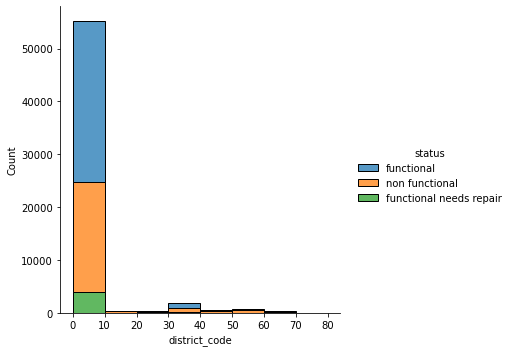

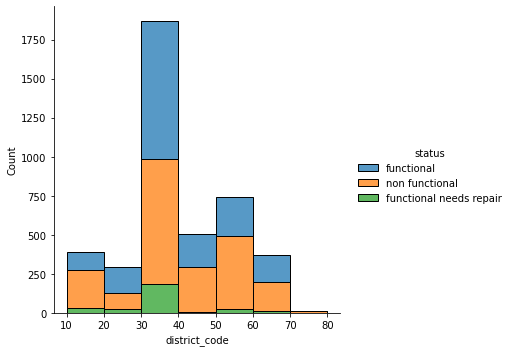

In [20]:
sns.displot(data = pump, x = 'district_code', hue = 'status', multiple = 'stack', bins = range(0,81,10))
sns.displot(data = pump, x = 'district_code', hue = 'status', multiple = 'stack', bins = range(10,81,10))

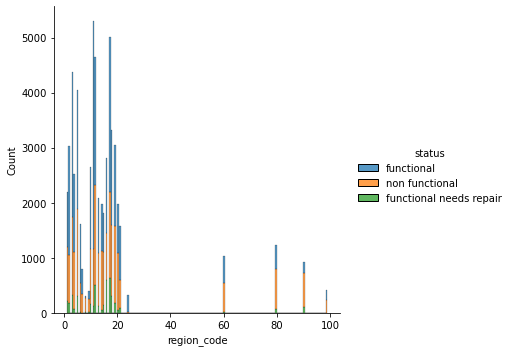

In [21]:
sns.displot(data = pump, x = 'region_code', hue = 'status', multiple = 'stack')

In [22]:
print(pump[['region','region_code']].nunique())
pump[['region','region_code']].head(20)

region         21
region_code    27
dtype: int64


,region,region_code
0,Iringa,11
1,Mara,20
2,Manyara,21
3,Mtwara,90
4,Kagera,18
5,Tanga,4
6,Shinyanga,17
7,Shinyanga,17
8,Tabora,14
9,Kagera,18


It looks like region_code is the same as the region, just with numerical labeling. We'll probably drop region_code and possibly OneHotEncode the region. But for some reason there are more unique region codes than regions.

In [23]:
pump.head()

,id,amount_tsh,date_recorded,funder,gps_height,installer,longitude,latitude,wpt_name,num_private,basin,subvillage,region,region_code,district_code,lga,ward,population,public_meeting,recorded_by,scheme_management,scheme_name,permit,construction_year,extraction_type,extraction_type_group,extraction_type_class,management,management_group,payment,payment_type,water_quality,quality_group,quantity,quantity_group,source,source_type,source_class,waterpoint_type,waterpoint_type_group,status,year_recorded,month_recorded,age,gps_height_bins
0,69572,6000.0,2011-03-14,Roman,1390,Roman,34.938093,-9.856322,none,0,Lake Nyasa,Mnyusi B,Iringa,11,5,Ludewa,Mundindi,109,True,GeoData Consultants Ltd,VWC,Roman,False,1999,gravity,gravity,gravity,vwc,user-group,pay annually,annually,soft,good,enough,enough,spring,spring,groundwater,communal standpipe,communal standpipe,functional,2011,3,12,"(1000, 1500]"
1,8776,0.0,2013-03-06,Grumeti,1399,GRUMETI,34.698766,-2.147466,Zahanati,0,Lake Victoria,Nyamara,Mara,20,2,Serengeti,Natta,280,NaN,GeoData Consultants Ltd,Other,NaN,True,2010,gravity,gravity,gravity,wug,user-group,never pay,never pay,soft,good,insufficient,insufficient,rainwater harvesting,rainwater harvesting,surface,communal standpipe,communal standpipe,functional,2013,3,3,"(1000, 1500]"
2,34310,25.0,2013-02-25,Lottery Club,686,World vision,37.460664,-3.821329,Kwa Mahundi,0,Pangani,Majengo,Manyara,21,4,Simanjiro,Ngorika,250,True,GeoData Consultants Ltd,VWC,Nyumba ya mungu pipe scheme,True,2009,gravity,gravity,gravity,vwc,user-group,pay per bucket,per bucket,soft,good,enough,enough,dam,dam,surface,communal standpipe multiple,communal standpipe,functional,2013,2,4,"(500, 1000]"
3,67743,0.0,2013-01-28,Unicef,263,UNICEF,38.486161,-11.155298,Zahanati Ya Nanyumbu,0,Ruvuma / Southern Coast,Mahakamani,Mtwara,90,63,Nanyumbu,Nanyumbu,58,True,GeoData Consultants Ltd,VWC,NaN,True,1986,submersible,submersible,submersible,vwc,user-group,never pay,never pay,soft,good,dry,dry,machine dbh,borehole,groundwater,communal standpipe multiple,communal standpipe,non functional,2013,1,27,"(0, 500]"
4,19728,0.0,2011-07-13,Action In A,0,Artisan,31.130847,-1.825359,Shuleni,0,Lake Victoria,Kyanyamisa,Kagera,18,1,Karagwe,Nyakasimbi,0,True,GeoData Consultants Ltd,NaN,NaN,True,0,gravity,gravity,gravity,other,other,never pay,never pay,soft,good,seasonal,seasonal,rainwater harvesting,rainwater harvesting,surface,communal standpipe,communal standpipe,functional,2011,7,2011,"(-100, 0]"


[Text(0, 0, 'Lake Nyasa'),
 Text(1, 0, 'Lake Victoria'),
 Text(2, 0, 'Pangani'),
 Text(3, 0, 'Ruvuma / Southern Coast'),
 Text(4, 0, 'Internal'),
 Text(5, 0, 'Lake Tanganyika'),
 Text(6, 0, 'Wami / Ruvu'),
 Text(7, 0, 'Rufiji'),
 Text(8, 0, 'Lake Rukwa')]

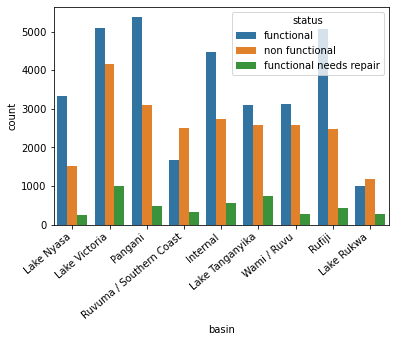

In [24]:
basin_plot = sns.countplot(data = pump, x = 'basin', hue = 'status')
basin_plot.set_xticklabels(basin_plot.get_xticklabels(), rotation=40, ha="right")

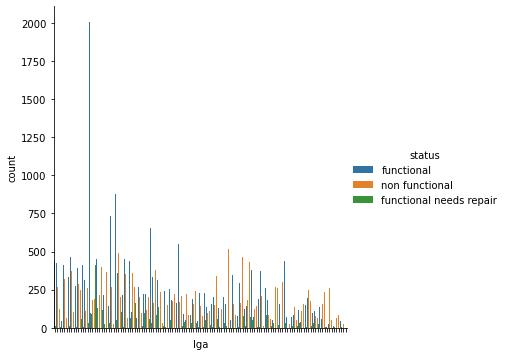

In [25]:
lga_plot = sns.catplot(data = pump, x = 'lga', hue = 'status', kind = 'count')
lga_plot.set(xticklabels=[])

In [26]:
pump.nunique().sort_values(ascending = False)

id                       59400
latitude                 57517
longitude                57516
wpt_name                 37400
subvillage               19287
scheme_name               2696
gps_height                2428
installer                 2145
ward                      2092
funder                    1897
population                1049
date_recorded              356
lga                        125
amount_tsh                  98
num_private                 65
age                         65
construction_year           55
region_code                 27
region                      21
district_code               20
extraction_type             18
extraction_type_group       13
management                  12
month_recorded              12
scheme_management           12
source                      10
basin                        9
water_quality                8
gps_height_bins              7
extraction_type_class        7
payment                      7
payment_type                 7
source_t

In [27]:
object_cols = []
for col in pump.columns:
    if pump[col].dtype == 'object':
        object_cols.append(col)
print(object_cols)

['funder', 'installer', 'wpt_name', 'basin', 'subvillage', 'region', 'lga', 'ward', 'public_meeting', 'recorded_by', 'scheme_management', 'scheme_name', 'permit', 'extraction_type', 'extraction_type_group', 'extraction_type_class', 'management', 'management_group', 'payment', 'payment_type', 'water_quality', 'quality_group', 'quantity', 'quantity_group', 'source', 'source_type', 'source_class', 'waterpoint_type', 'waterpoint_type_group', 'status']


In [28]:
for col in object_cols:
    print('\n')
    print(pump[col].value_counts()/pump.shape[0])



Government Of Tanzania    0.152929
Danida                    0.052424
Hesawa                    0.037071
Rwssp                     0.023131
World Bank                0.022710
                            ...   
Zao                       0.000017
Rwsso                     0.000017
Masai Land                0.000017
Sipdo                     0.000017
Kiwanda Cha Ngozi         0.000017
Name: funder, Length: 1897, dtype: float64


DWE                  0.292963
Government           0.030724
RWE                  0.020303
Commu                0.017845
DANIDA               0.017677
                       ...   
villager             0.000017
Islamic community    0.000017
William Acles        0.000017
PNR co               0.000017
DANIAD               0.000017
Name: installer, Length: 2145, dtype: float64


none                 0.059983
Shuleni              0.029428
Zahanati             0.013973
Msikitini            0.009007
Kanisani             0.005438
                       ...   
Milago Gro

Looking at the number of unique values, the following features will likely make our model too complex:

funder, installer, wpt_name, subvillage, ward, scheme_name. 

recorded_by also has a single unique value. So recorded_by will be of no use to us.

<AxesSubplot:xlabel='extraction_type_class', ylabel='count'>

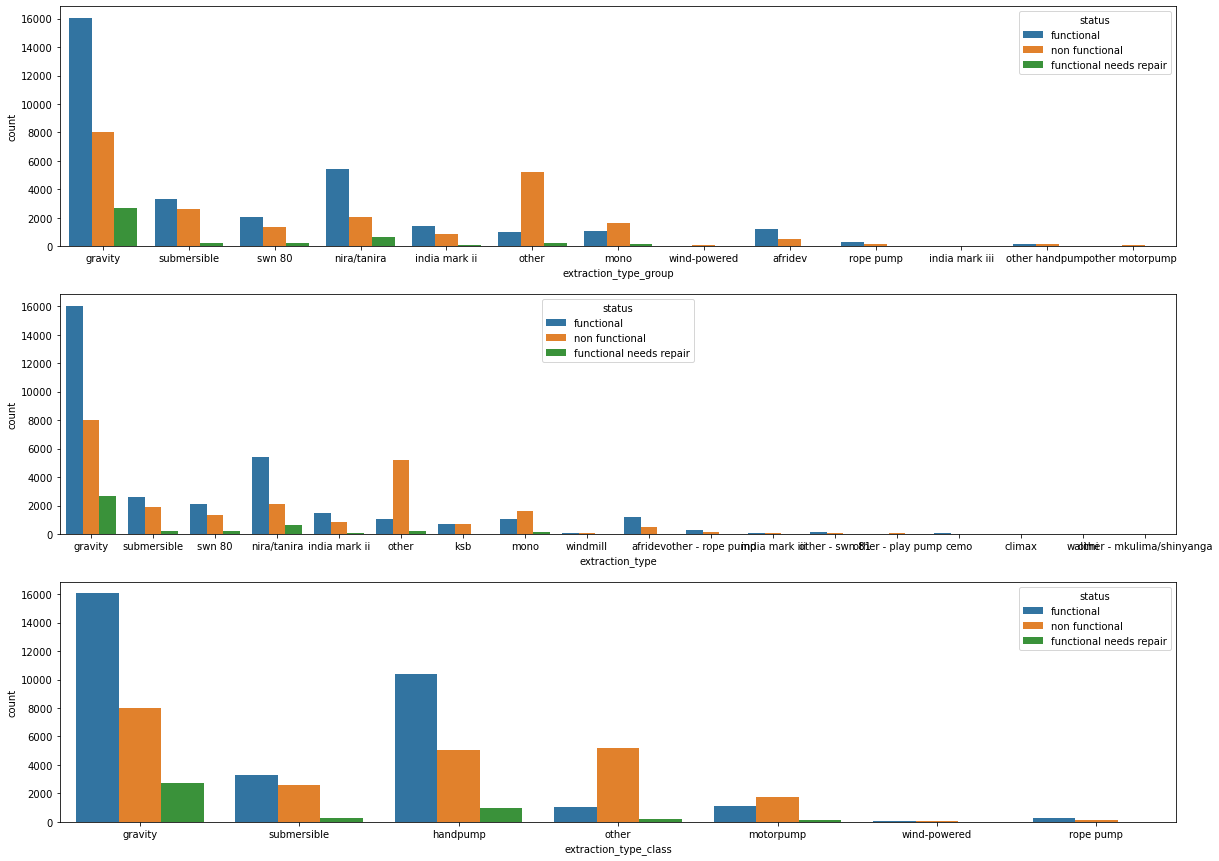

In [29]:
fig, ax = plt.subplots(3,1, figsize = [20,15])
sns.countplot(data = pump, x = 'extraction_type_group', hue = 'status', ax = ax[0])
sns.countplot(data = pump, x = 'extraction_type', hue = 'status', ax = ax[1])
sns.countplot(data = pump, x = 'extraction_type_class', hue = 'status', ax = ax[2])

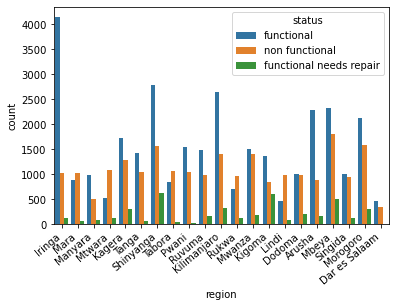

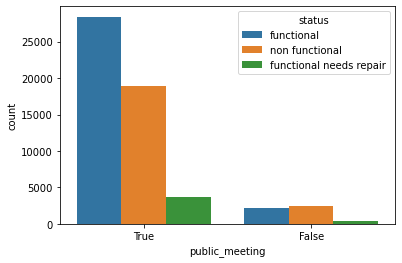

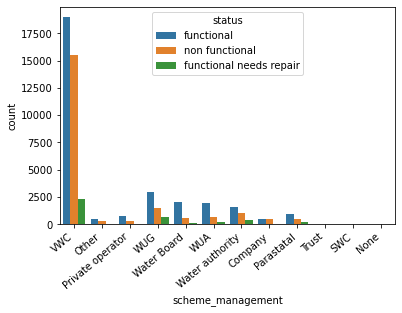

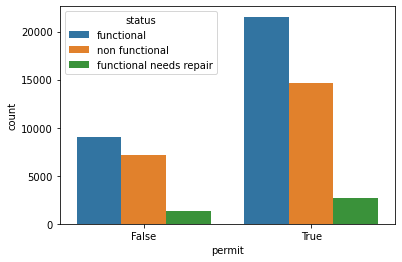

In [30]:
ax = sns.countplot(data = pump, x = 'region', hue = 'status')
ax.set_xticklabels(ax.get_xticklabels(), rotation=40, ha="right")
plt.show()
sns.countplot(data = pump, x = 'public_meeting', hue = 'status')
plt.show()
ax = sns.countplot(data = pump, x = 'scheme_management', hue = 'status')
ax.set_xticklabels(ax.get_xticklabels(), rotation=40, ha="right")
plt.show()
sns.countplot(data = pump, x = 'permit', hue = 'status')
plt.show()

region and public_meeting look pretty useful. If we use region, it probably wouldn't be useful to use longitude and latitude.

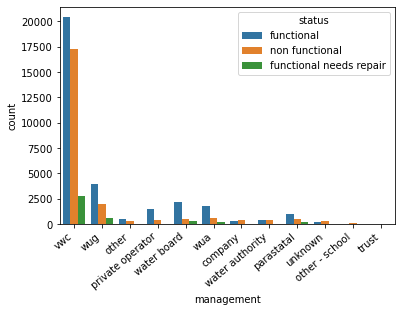

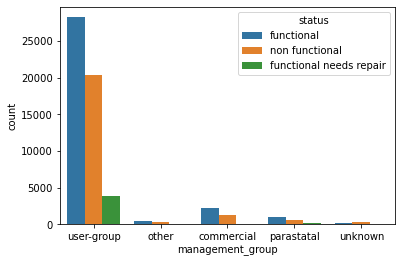

In [31]:
ax = sns.countplot(data = pump, x = 'management', hue = 'status')
ax.set_xticklabels(ax.get_xticklabels(), rotation=40, ha="right")
plt.show()
sns.countplot(data = pump, x = 'management_group', hue = 'status')
plt.show()

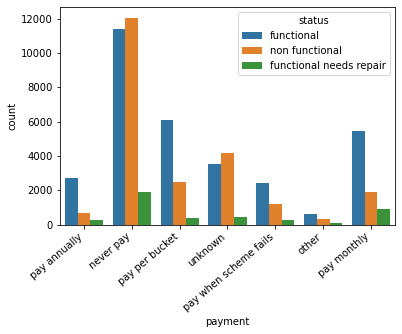

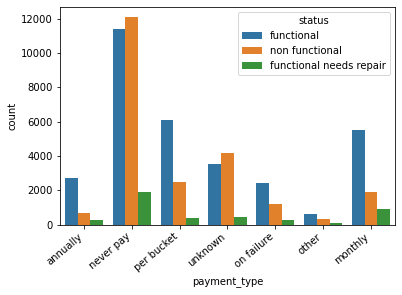

In [32]:
ax = sns.countplot(data = pump, x = 'payment', hue = 'status')
ax.set_xticklabels(ax.get_xticklabels(), rotation=40, ha="right")
plt.show()
ax = sns.countplot(data = pump, x = 'payment_type', hue = 'status')
ax.set_xticklabels(ax.get_xticklabels(), rotation=40, ha="right")
plt.show()

payment_type and payment are identical. Just some minor differences in labeling.

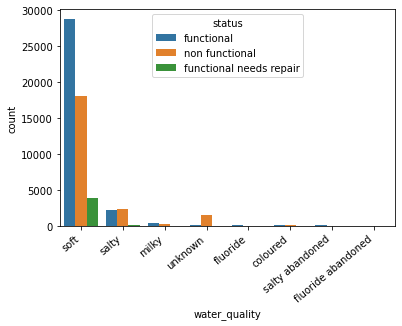

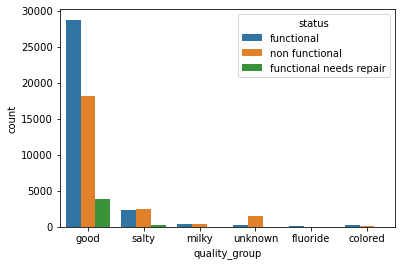

In [33]:
ax = sns.countplot(data = pump, x = 'water_quality', hue = 'status')
ax.set_xticklabels(ax.get_xticklabels(), rotation=40, ha="right")
plt.show()
sns.countplot(data = pump, x = 'quality_group', hue = 'status')    
plt.show()

It looks like water_quality and quality_group pretty much convey the same information. We'll probably drop one of the 2.

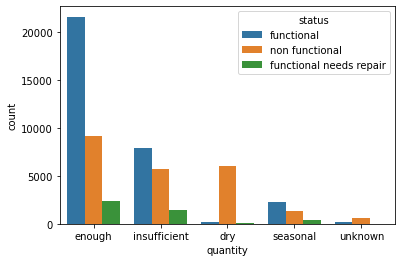

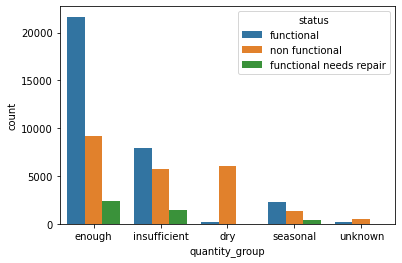

In [34]:
sns.countplot(data = pump, x = 'quantity', hue = 'status')
plt.show()
sns.countplot(data = pump, x = 'quantity_group', hue = 'status')
plt.show()

Quantity and quantity_group also appear to be identitical. We'll drop one of these.

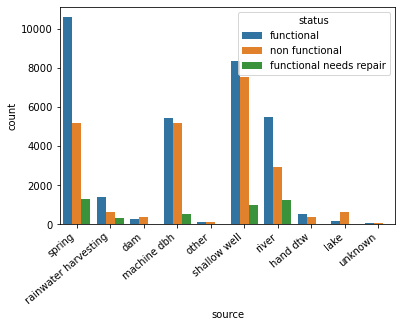

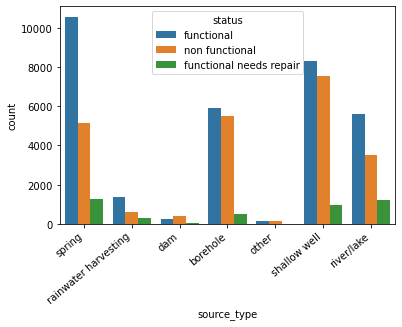

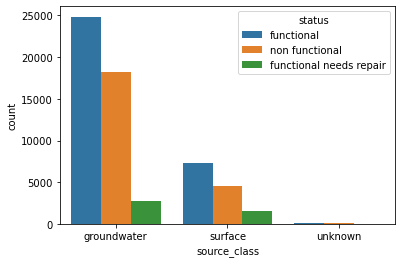

In [35]:
ax = sns.countplot(data = pump, x = 'source', hue = 'status')
ax.set_xticklabels(ax.get_xticklabels(), rotation=40, ha="right")
plt.show()
ax = sns.countplot(data = pump, x = 'source_type', hue = 'status')
ax.set_xticklabels(ax.get_xticklabels(), rotation=40, ha="right")
plt.show()
sns.countplot(data = pump, x = 'source_class', hue = 'status')
plt.show()

source_class appears to be useless. It doesn't look like the value of source_class has any predictive power over the status. Source and source_type appear to be similar with a few combined categories in source_type.

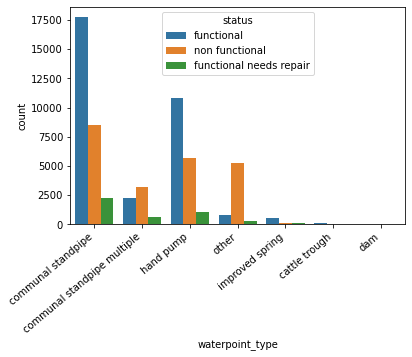

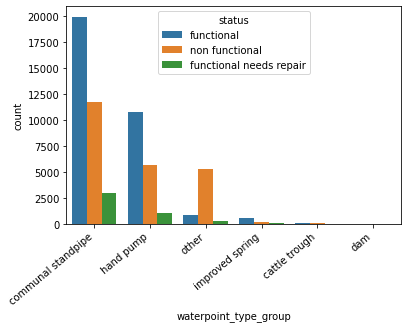

In [36]:
ax = sns.countplot(data = pump, x = 'waterpoint_type', hue = 'status')
ax.set_xticklabels(ax.get_xticklabels(), rotation=40, ha="right")
plt.show()
ax = sns.countplot(data = pump, x = 'waterpoint_type_group', hue = 'status')
ax.set_xticklabels(ax.get_xticklabels(), rotation=40, ha="right")
plt.show()

waterpoint_type and waterpoint_type_group convey similar information. It looks life for waterpoint_type_group, communal standpipe is just communal standpipe + communal standpipe multiple (from waterpoint_type). communal standpipe multiple seems useful, so we'll probably drop waterpoint_type_group.

In [37]:
num_cols = []
for col in pump.columns:
    if pump[col].dtype != 'object':
        num_cols.append(col)
print(num_cols)

['id', 'amount_tsh', 'date_recorded', 'gps_height', 'longitude', 'latitude', 'num_private', 'region_code', 'district_code', 'population', 'construction_year', 'year_recorded', 'month_recorded', 'age', 'gps_height_bins']


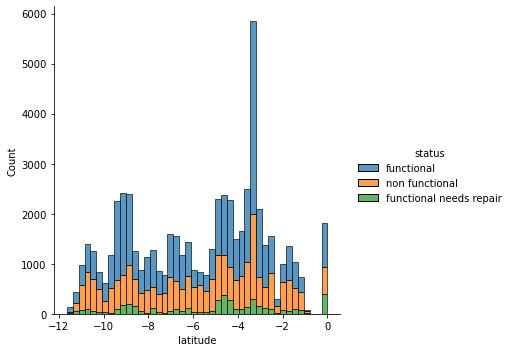

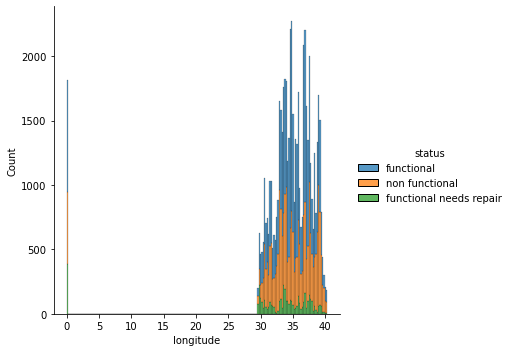

In [38]:
sns.displot(data = pump, x = 'latitude', hue = 'status', multiple = 'stack')
sns.displot(data = pump, x = 'longitude', hue = 'status', multiple = 'stack')

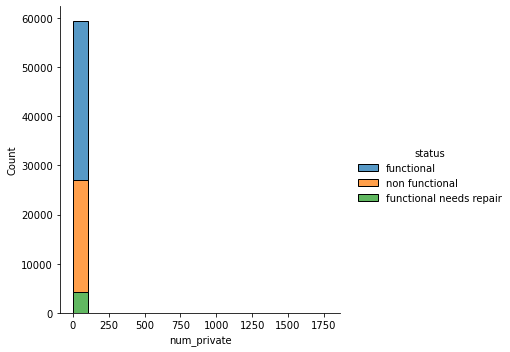

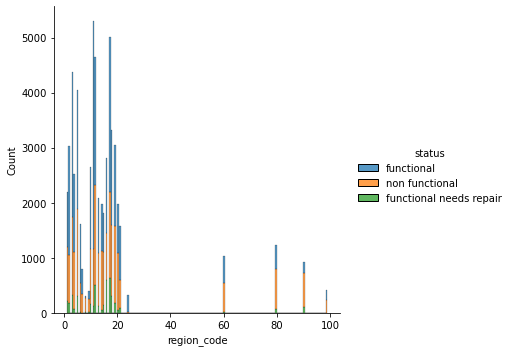

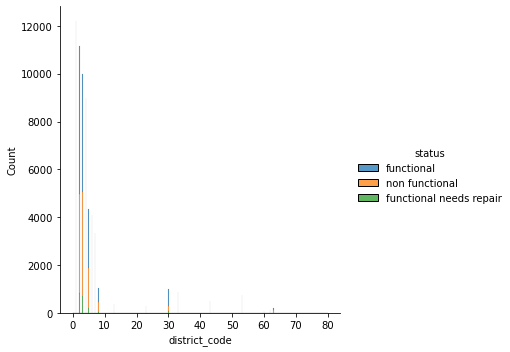

In [39]:
sns.displot(data = pump, x = 'num_private', hue = 'status', multiple = 'stack')
sns.displot(data = pump, x = 'region_code', hue = 'status', multiple = 'stack')
sns.displot(data = pump, x = 'district_code', hue = 'status', multiple = 'stack')

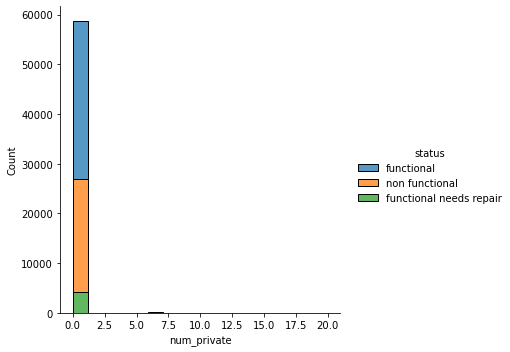

In [40]:
sns.displot(data = pump, x = 'num_private', hue = 'status', multiple = 'stack', binrange = (0,20))

num_private appears to be useless. According to the dataset description, region_code should convey the same information as region. district_code does not look useful.